# DeepLabCut Toolbox - Docker
https://github.com/AlexEMG/DeepLabCut

Nath\*, Mathis\* et al. *Using DeepLabCut for markerless pose estimation during behavior across species*

This notebook demonstrates the necessary steps to use DeepLabCut on your own project.
This shows the most simple code to do so, but many of the functions have additional features, so please check out the overview & the protocol paper!

This notebook illustrates how to use the Docker container to:
- train a network
- evaluate a network
- analyze a novel video

This assumes you already have a project folder with labeled data! 


## Let's look at info about the Docker Environment:


In [1]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2017 NVIDIA Corporation
Built on Fri_Sep__1_21:08:03_CDT_2017
Cuda compilation tools, release 9.0, V9.0.176


In [2]:
import tensorflow as tf
tf.__version__

'1.8.0'

In [3]:
#let's make sure we see a GPU:
#tf.test.gpu_device_name()
#or
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 11332800556434903739, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 10921944679
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 17673159228041643527
 physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1"]

## Start here for training DeepLabCut and analyzing new videos!

In [4]:
#GUIs don't work on in Docker (or the cloud), so label your data locally on your computer! 
#This notebook is for you to train and run video analysis!
import os
os.environ["DLClight"]="True"

In [5]:
# now we are ready to train!
import deeplabcut
deeplabcut.__version__

DLC loaded in light mode; you cannot use the relabeling GUI!
DLC loaded in light mode; you cannot use the relabeling GUI!


'2.0.1'

### change to your path:

In [6]:
path_config_file = '/home/alfomi/work/DLC_DOCKER/example-pia/Tracking-Pia-2018-12-06/config.yaml' #change to yours!

## Note, if you moved the project, or downloaded this and using the demo code, you will need to edit the project path in the config.yaml file! 

Head over to the project folder to open the yaml file in any text editor (such as gedit in Ubuntu)

(description): project_path:  Full path of the project (edit if you need to move the project to a clus-ter/server/another computer or a different directory on your computer)

## Create a training dataset
This function generates the training data information for DeepCut (which requires a mat file) based on the pandas dataframes that hold label information. The user can set the fraction of the training set size (from all labeled image in the hd5 file) in the config.yaml file. While creating the dataset, the user can create multiple shuffles. 

After running this script the training dataset is created and saved in the project directory under the subdirectory **'training-datasets'**

This function also creates new subdirectories under **dlc-models** and appends the project config.yaml file with the correct path to the training and testing pose configuration file. These files hold the parameters for training the network. Such an example file is provided with the toolbox and named as **pose_cfg.yaml**.

In [7]:
deeplabcut.create_training_dataset(path_config_file,Shuffles=[1])

The training dataset is successfully created. Use the function 'train_network' to start training. Happy training!


### now go edit the pose_cfg.yaml to make display_iters: low (i.e. 10), and save_iters: 500 (for demo's)

Now it is the time to start training the network!

## Start training
This function trains the network for a specific shuffle of the training dataset. 

In [8]:
#reset in case you started a session before...
#tf.reset_default_graph()

deeplabcut.train_network(path_config_file, shuffle=1)

#this will run until you stop it (CTRL+C), or hit "STOP" icon, or when it hits the end (default, 1.3M iterations). 
#Whichever you chose, you will see what looks like an error message, but it's not an error - don't worry....


Config:
{'all_joints': [[0], [1], [2], [3], [4]],
 'all_joints_names': ['ShoulderBlade', 'Shoulder', 'Wrist', 'Finger', 'Tip'],
 'batch_size': 1,
 'bottomheight': 400,
 'crop': True,
 'crop_pad': 0,
 'cropratio': 0.4,
 'dataset': 'training-datasets/iteration-0/UnaugmentedDataSet_TrackingDec6/Tracking_Pia95shuffle1.mat',
 'dataset_type': 'default',
 'display_iters': 1000,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': '/usr/local/lib/python3.6/dist-packages/deeplabcut/pose_estimation_tensorflow/models/pretrained/resnet_v1_50.ckpt',
 'intermediate_supervision': False,
 'intermediate_supervision_layer': 12,
 'leftwidth': 400,
 'location_refinement': True,
 'locref_huber_loss': True,
 'locref_loss_weight': 0.05,
 'locref_stdev': 7.2801,
 'log_dir': 'log',
 'max_input_size': 1000,
 'mean_pixel': [123.68, 116.779, 103.939],
 'metadataset': 'training-datasets/iteration-0/UnaugmentedDataSet_TrackingDec6/Documentation_data-Tracking_95shuffle1.pickle',
 'minsize': 100,
 'mirror': F

INFO:tensorflow:Restoring parameters from /usr/local/lib/python3.6/dist-packages/deeplabcut/pose_estimation_tensorflow/models/pretrained/resnet_v1_50.ckpt


Restoring parameters from /usr/local/lib/python3.6/dist-packages/deeplabcut/pose_estimation_tensorflow/models/pretrained/resnet_v1_50.ckpt


Training parameter:
{'stride': 8.0, 'weigh_part_predictions': False, 'weigh_negatives': False, 'fg_fraction': 0.25, 'weigh_only_present_joints': False, 'mean_pixel': [123.68, 116.779, 103.939], 'shuffle': True, 'snapshot_prefix': '/home/alfomi/work/DLC_DOCKER/example-pia/Tracking-Pia-2018-12-06/dlc-models/iteration-0/TrackingDec6-trainset95shuffle1/train/snapshot', 'log_dir': 'log', 'global_scale': 0.8, 'location_refinement': True, 'locref_stdev': 7.2801, 'locref_loss_weight': 0.05, 'locref_huber_loss': True, 'optimizer': 'sgd', 'intermediate_supervision': False, 'intermediate_supervision_layer': 12, 'regularize': False, 'weight_decay': 0.0001, 'mirror': False, 'crop_pad': 0, 'scoremap_dir': 'test', 'dataset_type': 'default', 'use_gt_segm': False, 'batch_size': 1, 'video': False, 'video_batch': False, 'crop': True, 'cropratio': 0.4, 'minsize': 100, 'leftwidth': 400, 'rightwidth': 400, 'topheight': 400, 'bottomheight': 400, 'all_joints': [[0], [1], [2], [3], [4]], 'all_joints_names': ['

iteration: 1000 loss: 0.0185 lr: 0.005
iteration: 2000 loss: 0.0085 lr: 0.005
iteration: 3000 loss: 0.0067 lr: 0.005
iteration: 4000 loss: 0.0056 lr: 0.005
iteration: 5000 loss: 0.0049 lr: 0.005
iteration: 6000 loss: 0.0045 lr: 0.005
iteration: 7000 loss: 0.0043 lr: 0.005
iteration: 8000 loss: 0.0037 lr: 0.005
iteration: 9000 loss: 0.0036 lr: 0.005
iteration: 10000 loss: 0.0033 lr: 0.005
iteration: 11000 loss: 0.0054 lr: 0.02
iteration: 12000 loss: 0.0043 lr: 0.02
iteration: 13000 loss: 0.0038 lr: 0.02
iteration: 14000 loss: 0.0033 lr: 0.02
iteration: 15000 loss: 0.0032 lr: 0.02
iteration: 16000 loss: 0.0028 lr: 0.02
iteration: 17000 loss: 0.0028 lr: 0.02
iteration: 18000 loss: 0.0026 lr: 0.02
iteration: 19000 loss: 0.0024 lr: 0.02
iteration: 20000 loss: 0.0024 lr: 0.02
iteration: 21000 loss: 0.0022 lr: 0.02
iteration: 22000 loss: 0.0023 lr: 0.02
iteration: 23000 loss: 0.0022 lr: 0.02
iteration: 24000 loss: 0.0023 lr: 0.02
iteration: 25000 loss: 0.0020 lr: 0.02
iteration: 26000 loss: 0

iteration: 209000 loss: 0.0011 lr: 0.02
iteration: 210000 loss: 0.0011 lr: 0.02
iteration: 211000 loss: 0.0010 lr: 0.02
iteration: 212000 loss: 0.0011 lr: 0.02
iteration: 213000 loss: 0.0010 lr: 0.02
iteration: 214000 loss: 0.0011 lr: 0.02
iteration: 215000 loss: 0.0011 lr: 0.02
iteration: 216000 loss: 0.0010 lr: 0.02
iteration: 217000 loss: 0.0011 lr: 0.02
iteration: 218000 loss: 0.0010 lr: 0.02
iteration: 219000 loss: 0.0010 lr: 0.02
iteration: 220000 loss: 0.0010 lr: 0.02
iteration: 221000 loss: 0.0010 lr: 0.02
iteration: 222000 loss: 0.0010 lr: 0.02
iteration: 223000 loss: 0.0011 lr: 0.02
iteration: 224000 loss: 0.0010 lr: 0.02
iteration: 225000 loss: 0.0010 lr: 0.02
iteration: 226000 loss: 0.0010 lr: 0.02
iteration: 227000 loss: 0.0010 lr: 0.02
iteration: 228000 loss: 0.0010 lr: 0.02
iteration: 229000 loss: 0.0010 lr: 0.02
iteration: 230000 loss: 0.0010 lr: 0.02
iteration: 231000 loss: 0.0010 lr: 0.02
iteration: 232000 loss: 0.0011 lr: 0.02
iteration: 233000 loss: 0.0010 lr: 0.02


iteration: 414000 loss: 0.0009 lr: 0.02
iteration: 415000 loss: 0.0009 lr: 0.02
iteration: 416000 loss: 0.0009 lr: 0.02
iteration: 417000 loss: 0.0009 lr: 0.02
iteration: 418000 loss: 0.0009 lr: 0.02
iteration: 419000 loss: 0.0008 lr: 0.02
iteration: 420000 loss: 0.0008 lr: 0.02
iteration: 421000 loss: 0.0009 lr: 0.02
iteration: 422000 loss: 0.0009 lr: 0.02
iteration: 423000 loss: 0.0008 lr: 0.02
iteration: 424000 loss: 0.0008 lr: 0.02
iteration: 425000 loss: 0.0008 lr: 0.02
iteration: 426000 loss: 0.0008 lr: 0.02
iteration: 427000 loss: 0.0008 lr: 0.02
iteration: 428000 loss: 0.0008 lr: 0.02
iteration: 429000 loss: 0.0008 lr: 0.02
iteration: 430000 loss: 0.0009 lr: 0.02
iteration: 431000 loss: 0.0008 lr: 0.002
iteration: 432000 loss: 0.0007 lr: 0.002
iteration: 433000 loss: 0.0007 lr: 0.002
iteration: 434000 loss: 0.0007 lr: 0.002
iteration: 435000 loss: 0.0007 lr: 0.002
iteration: 436000 loss: 0.0007 lr: 0.002
iteration: 437000 loss: 0.0007 lr: 0.002
iteration: 438000 loss: 0.0007 lr

iteration: 615000 loss: 0.0006 lr: 0.002
iteration: 616000 loss: 0.0006 lr: 0.002
iteration: 617000 loss: 0.0006 lr: 0.002
iteration: 618000 loss: 0.0007 lr: 0.002
iteration: 619000 loss: 0.0007 lr: 0.002
iteration: 620000 loss: 0.0006 lr: 0.002
iteration: 621000 loss: 0.0006 lr: 0.002
iteration: 622000 loss: 0.0006 lr: 0.002
iteration: 623000 loss: 0.0007 lr: 0.002
iteration: 624000 loss: 0.0006 lr: 0.002
iteration: 625000 loss: 0.0006 lr: 0.002
iteration: 626000 loss: 0.0006 lr: 0.002
iteration: 627000 loss: 0.0006 lr: 0.002
iteration: 628000 loss: 0.0006 lr: 0.002
iteration: 629000 loss: 0.0006 lr: 0.002
iteration: 630000 loss: 0.0006 lr: 0.002
iteration: 631000 loss: 0.0007 lr: 0.002
iteration: 632000 loss: 0.0006 lr: 0.002
iteration: 633000 loss: 0.0007 lr: 0.002
iteration: 634000 loss: 0.0006 lr: 0.002
iteration: 635000 loss: 0.0006 lr: 0.002
iteration: 636000 loss: 0.0006 lr: 0.002
iteration: 637000 loss: 0.0007 lr: 0.002
iteration: 638000 loss: 0.0006 lr: 0.002
iteration: 63900

iteration: 815000 loss: 0.0006 lr: 0.001
iteration: 816000 loss: 0.0006 lr: 0.001
iteration: 817000 loss: 0.0006 lr: 0.001
iteration: 818000 loss: 0.0006 lr: 0.001
iteration: 819000 loss: 0.0006 lr: 0.001
iteration: 820000 loss: 0.0006 lr: 0.001
iteration: 821000 loss: 0.0006 lr: 0.001
iteration: 822000 loss: 0.0006 lr: 0.001
iteration: 823000 loss: 0.0006 lr: 0.001
iteration: 824000 loss: 0.0006 lr: 0.001
iteration: 825000 loss: 0.0006 lr: 0.001
iteration: 826000 loss: 0.0006 lr: 0.001
iteration: 827000 loss: 0.0006 lr: 0.001
iteration: 828000 loss: 0.0006 lr: 0.001
iteration: 829000 loss: 0.0006 lr: 0.001
iteration: 830000 loss: 0.0006 lr: 0.001
iteration: 831000 loss: 0.0006 lr: 0.001
iteration: 832000 loss: 0.0006 lr: 0.001
iteration: 833000 loss: 0.0006 lr: 0.001
iteration: 834000 loss: 0.0006 lr: 0.001
iteration: 835000 loss: 0.0006 lr: 0.001
iteration: 836000 loss: 0.0006 lr: 0.001
iteration: 837000 loss: 0.0006 lr: 0.001
iteration: 838000 loss: 0.0006 lr: 0.001
iteration: 83900

iteration: 1015000 loss: 0.0006 lr: 0.001
iteration: 1016000 loss: 0.0006 lr: 0.001
iteration: 1017000 loss: 0.0006 lr: 0.001
iteration: 1018000 loss: 0.0006 lr: 0.001
iteration: 1019000 loss: 0.0006 lr: 0.001
iteration: 1020000 loss: 0.0006 lr: 0.001
iteration: 1021000 loss: 0.0006 lr: 0.001
iteration: 1022000 loss: 0.0006 lr: 0.001
iteration: 1023000 loss: 0.0006 lr: 0.001
iteration: 1024000 loss: 0.0006 lr: 0.001
iteration: 1025000 loss: 0.0006 lr: 0.001
iteration: 1026000 loss: 0.0006 lr: 0.001
iteration: 1027000 loss: 0.0006 lr: 0.001
iteration: 1028000 loss: 0.0006 lr: 0.001
iteration: 1029000 loss: 0.0006 lr: 0.001
iteration: 1030000 loss: 0.0006 lr: 0.001


The network is now trained and ready to evaluate. Use the function 'evaluate_network' to evaluate the network.


Exception in thread Thread-4:
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py", line 1322, in _do_call
    return fn(*args)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.CancelledError: Enqueue operation was cancelled
	 [[Node: fifo_queue_enqueue = QueueEnqueueV2[Tcomponents=[DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT], timeout_ms=-1, _device="/job:localhost/replica:0/task:0/device:CPU:0"](fifo_queue, _arg_Placeholder_0_0, _arg_Placeholder_1_0_1, _arg_Placeholder_2_0_2, _arg_Placeholder_3_0_3, _arg_Placeholder_4_0_4)]]

During handling of the above exception, another exception occurred:

Traceback (most recent call 

### A couple tips for possible troubleshooting (1): 

if you get **permission errors** when you run this step (above), first check if the weights downloaded. As some docker containers might not have privileges for this (it can be user specific). They should be under 'init_weights' (see path in the pose_cfg.yaml file). You can enter the DOCKER in the terminal:

see more here: https://github.com/MMathisLab/Docker4DeepLabCut2.0#using-the-docker-for-training-and-video-analysis

You can "cd" in the terminal to this location! i.e. copy and paste this in: **"cd usr/local/lib/python3.6/dist-packages/deeplabcut/pose_estimation_tensorflow/models/pretrained/
"** 

And if you type "ls" to see the list of files, you should see the resnet:
**resnet_v1_50.ckpt**

If it is not there, run **"sudo download.sh"**
then change the permissions: **"sudo chown yourusername:yourusername resnet_v1_50.ckpt"**


### Troubleshooting (2): 
if it appears the training does not start (i.e. "Starting training..." does not print immediately),
then you have another session running on your GPU. Go check "nvidia-smi" and look at the process names. You can only have 1 per GPU!)

## Start evaluating
This funtion evaluates a trained model for a specific shuffle/shuffles at a particular state or all the states on the data set (images)
and stores the results as .csv file in a subdirectory under **evaluation-results**

In [12]:
deeplabcut.evaluate_network(path_config_file)

# Here you want to see a low pixel error! Of course, it can only be as good as the labeler, so be sure your labels are good!

Config:
{'all_joints': [[0], [1], [2], [3]],
 'all_joints_names': ['hand', 'Finger1', 'Finger2', 'Joystick'],
 'batch_size': 1,
 'bottomheight': 400,
 'crop': True,
 'crop_pad': 0,
 'cropratio': 0.4,
 'dataset': 'training-datasets/iteration-0/UnaugmentedDataSet_ReachingAug30/Reaching_Mackenzie95shuffle1.mat',
 'dataset_type': 'default',
 'display_iters': 10,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': '/usr/local/lib/python3.6/dist-packages/deeplabcut/pose_estimation_tensorflow/models/pretrained/resnet_v1_50.ckpt',
 'intermediate_supervision': False,
 'intermediate_supervision_layer': 12,
 'leftwidth': 400,
 'location_refinement': True,
 'locref_huber_loss': True,
 'locref_loss_weight': 0.05,
 'locref_stdev': 7.2801,
 'log_dir': 'log',
 'max_input_size': 1000,
 'mean_pixel': [123.68, 116.779, 103.939],
 'metadataset': 'training-datasets/iteration-0/UnaugmentedDataSet_ReachingAug30/Documentation_data-Reaching_95shuffle1.pickle',
 'minsize': 100,
 'mirror': False,
 'mult

Running  DeepCut_resnet50_ReachingAug30shuffle1_501500  with # of trainingiterations: 501500
INFO:tensorflow:Restoring parameters from /home/alfomi/work/DLC_DOCKER/DeepLabCut/examples/Reaching-Mackenzie-2018-08-30/dlc-models/iteration-0/ReachingAug30-trainset95shuffle1/train/snapshot-501500


Restoring parameters from /home/alfomi/work/DLC_DOCKER/DeepLabCut/examples/Reaching-Mackenzie-2018-08-30/dlc-models/iteration-0/ReachingAug30-trainset95shuffle1/train/snapshot-501500
Restoring parameters from /home/alfomi/work/DLC_DOCKER/DeepLabCut/examples/Reaching-Mackenzie-2018-08-30/dlc-models/iteration-0/ReachingAug30-trainset95shuffle1/train/snapshot-501500
Restoring parameters from /home/alfomi/work/DLC_DOCKER/DeepLabCut/examples/Reaching-Mackenzie-2018-08-30/dlc-models/iteration-0/ReachingAug30-trainset95shuffle1/train/snapshot-501500
0it [00:00, ?it/s]

Analyzing data...


20it [00:00, 25.67it/s]


Done and results stored for snapshot:  snapshot-501500
Results for 501500  training iterations: 95 1 train error: 0.68 pixels. Test error: 2.36  pixels.
With pcutoff of 0.1  train error: 0.68 pixels. Test error: 2.36 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
The network is evaluated and the results are stored in the subdirectory 'evaluation_results'.
If it generalizes well, choose the best model for prediction and update the config file with the appropriate index for the 'snapshotindex'.
Use the function 'analyze_video' to make predictions on new videos.
Otherwise consider retraining the network (see DeepLabCut workflow Fig 2)


## There is an optional refinement step
- if your pixel errors are not low enough, please check out the protocol guide on how to refine your network!
- You will need to adjust the labels **outside of DOCKER!** We recommend coming back to train and analyze videos... 
- pplease see the repo and protocol instructions on how to refine your data!

## Start Analyzing videos
This function analyzes the new video. The user can choose the best model from the evaluation results and specify the correct snapshot index for the variable **snapshotindex** in the **config.yaml** file. Otherwise, by default the most recent snapshot is used to analyse the video.

The results are stored in hd5 file in the same directory where the video resides. 

In [13]:
videofile_path = ['/home/alfomi/work/DLC_DOCKER/DeepLabCut/examples/Reaching-Mackenzie-2018-08-30/videos/MovieS2_Perturbation_noLaser_compressed.avi'] #Enter the list of videos to analyze.
deeplabcut.analyze_videos(path_config_file,videofile_path)

Config:
{'all_joints': [[0], [1], [2], [3]],
 'all_joints_names': ['hand', 'Finger1', 'Finger2', 'Joystick'],
 'batch_size': 1,
 'bottomheight': 400,
 'crop': True,
 'crop_pad': 0,
 'cropratio': 0.4,
 'dataset': 'training-datasets/iteration-0/UnaugmentedDataSet_ReachingAug30/Reaching_Mackenzie95shuffle1.mat',
 'dataset_type': 'default',
 'display_iters': 10,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': '/usr/local/lib/python3.6/dist-packages/deeplabcut/pose_estimation_tensorflow/models/pretrained/resnet_v1_50.ckpt',
 'intermediate_supervision': False,
 'intermediate_supervision_layer': 12,
 'leftwidth': 400,
 'location_refinement': True,
 'locref_huber_loss': True,
 'locref_loss_weight': 0.05,
 'locref_stdev': 7.2801,
 'log_dir': 'log',
 'max_input_size': 1000,
 'mean_pixel': [123.68, 116.779, 103.939],
 'metadataset': 'training-datasets/iteration-0/UnaugmentedDataSet_ReachingAug30/Documentation_data-Reaching_95shuffle1.pickle',
 'minsize': 100,
 'mirror': False,
 'mult

Using snapshot-501500 for model /home/alfomi/work/DLC_DOCKER/DeepLabCut/examples/Reaching-Mackenzie-2018-08-30/dlc-models/iteration-0/ReachingAug30-trainset95shuffle1
INFO:tensorflow:Restoring parameters from /home/alfomi/work/DLC_DOCKER/DeepLabCut/examples/Reaching-Mackenzie-2018-08-30/dlc-models/iteration-0/ReachingAug30-trainset95shuffle1/train/snapshot-501500


Restoring parameters from /home/alfomi/work/DLC_DOCKER/DeepLabCut/examples/Reaching-Mackenzie-2018-08-30/dlc-models/iteration-0/ReachingAug30-trainset95shuffle1/train/snapshot-501500
Restoring parameters from /home/alfomi/work/DLC_DOCKER/DeepLabCut/examples/Reaching-Mackenzie-2018-08-30/dlc-models/iteration-0/ReachingAug30-trainset95shuffle1/train/snapshot-501500
Restoring parameters from /home/alfomi/work/DLC_DOCKER/DeepLabCut/examples/Reaching-Mackenzie-2018-08-30/dlc-models/iteration-0/ReachingAug30-trainset95shuffle1/train/snapshot-501500
  0%|          | 0/256 [00:00<?, ?it/s]

/home/alfomi/work/DLC_DOCKER/DeepLabCut/examples/Reaching-Mackenzie-2018-08-30/videos/MovieS2_Perturbation_noLaser_compressed.avi
Starting %  /home/alfomi/work/DLC_DOCKER/DeepLabCut/examples/Reaching-Mackenzie-2018-08-30/videos/MovieS2_Perturbation_noLaser_compressed.avi
Loading  /home/alfomi/work/DLC_DOCKER/DeepLabCut/examples/Reaching-Mackenzie-2018-08-30/videos/MovieS2_Perturbation_noLaser_compressed.avi
Duration of video [s]:  8.53 , recorded with  30.0 fps!
Overall # of frames:  256 without cropped frame dimensions:  840 743
Starting to extract posture


260it [00:10, 25.92it/s]                         

Saving results in /home/alfomi/work/DLC_DOCKER/DeepLabCut/examples/Reaching-Mackenzie-2018-08-30/videos...
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'.
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract any outlier frames!


## Create labeled video
This funtion is for visualiztion purpose and can be used to create a video in .mp4 format with labels predicted by the network. This video is saved in the same directory where the original video resides. 

In [14]:
deeplabcut.create_labeled_video(path_config_file,videofile_path)

  3%|▎         | 7/256 [00:00<00:03, 69.64it/s]

Starting %  /home/alfomi/work/DLC_DOCKER/DeepLabCut/examples/Reaching-Mackenzie-2018-08-30/videos ['/home/alfomi/work/DLC_DOCKER/DeepLabCut/examples/Reaching-Mackenzie-2018-08-30/videos/MovieS2_Perturbation_noLaser_compressed.avi']
Loading  /home/alfomi/work/DLC_DOCKER/DeepLabCut/examples/Reaching-Mackenzie-2018-08-30/videos/MovieS2_Perturbation_noLaser_compressed.avi and data.
False 0 840 0 743
256
Duration of video [s]:  8.53 , recorded with  30.0 fps!
Overall # of frames:  256 with cropped frame dimensions:  840 743
Generating frames and creating video.


100%|██████████| 256/256 [00:03<00:00, 75.21it/s]


## Plot the trajectories of the analyzed videos
This function plots the trajectories of all the body parts across the entire video. Each body part is identified by a unique color.

/home/alfomi/work/DLC_DOCKER/DeepLabCut/examples/Reaching-Mackenzie-2018-08-30/videos/MovieS2_Perturbation_noLaser_compressed.avi
Starting %  /home/alfomi/work/DLC_DOCKER/DeepLabCut/examples/Reaching-Mackenzie-2018-08-30/videos ['/home/alfomi/work/DLC_DOCKER/DeepLabCut/examples/Reaching-Mackenzie-2018-08-30/videos/MovieS2_Perturbation_noLaser_compressed.avi']
/home/alfomi/work/DLC_DOCKER/DeepLabCut/examples/Reaching-Mackenzie-2018-08-30/videos  already exists!
Loading  /home/alfomi/work/DLC_DOCKER/DeepLabCut/examples/Reaching-Mackenzie-2018-08-30/videos/MovieS2_Perturbation_noLaser_compressed.avi and data.


<IPython.core.display.Javascript object>


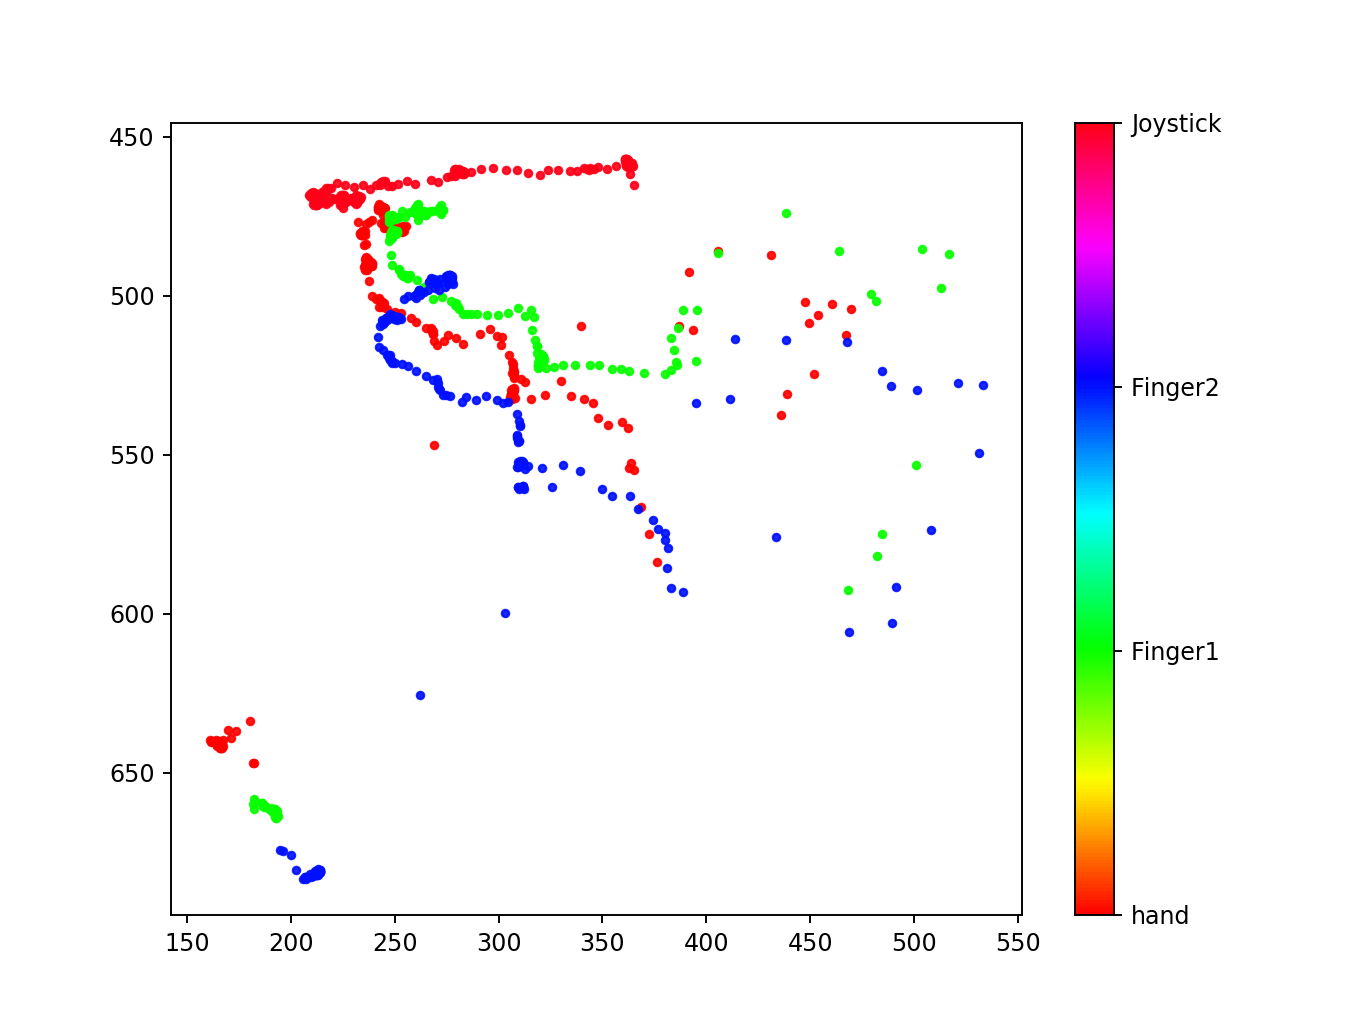

<IPython.core.display.Javascript object>


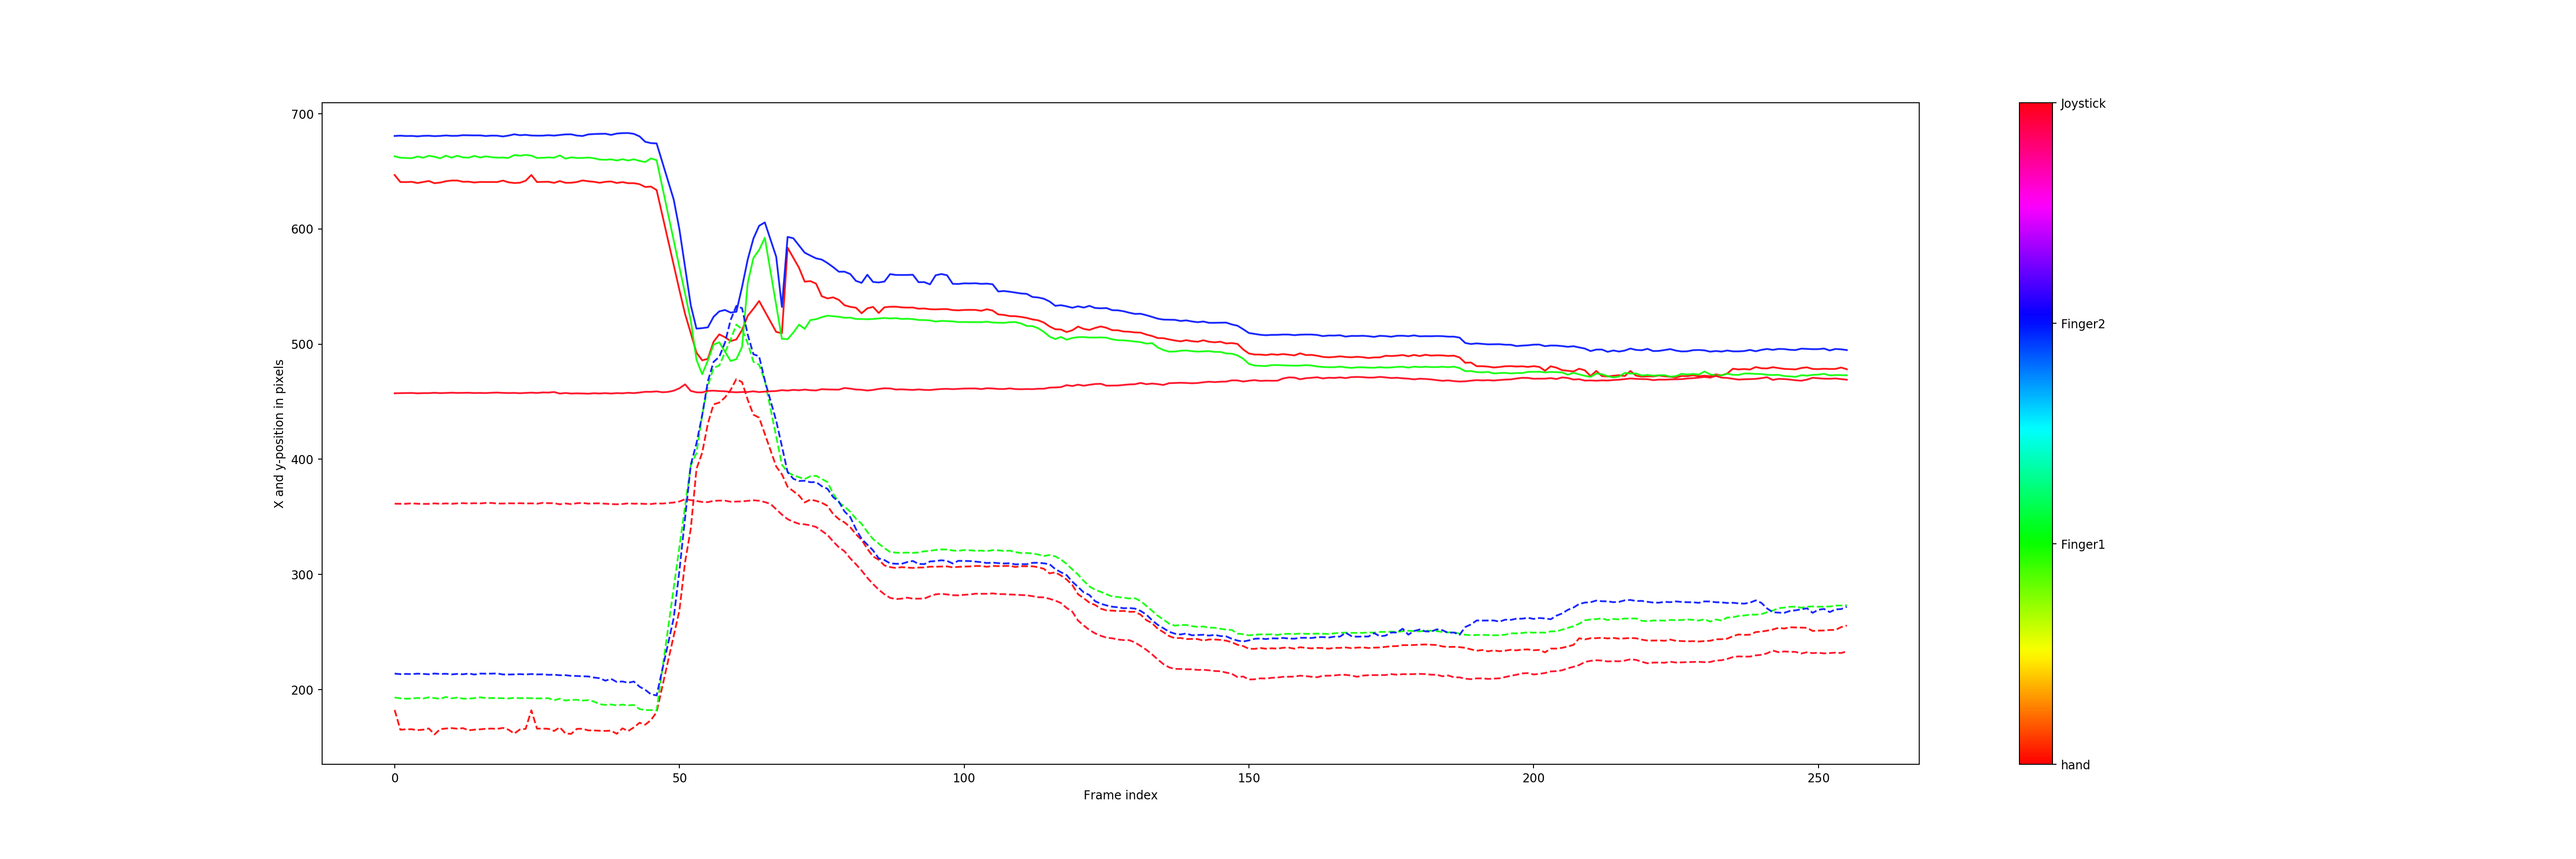

<IPython.core.display.Javascript object>


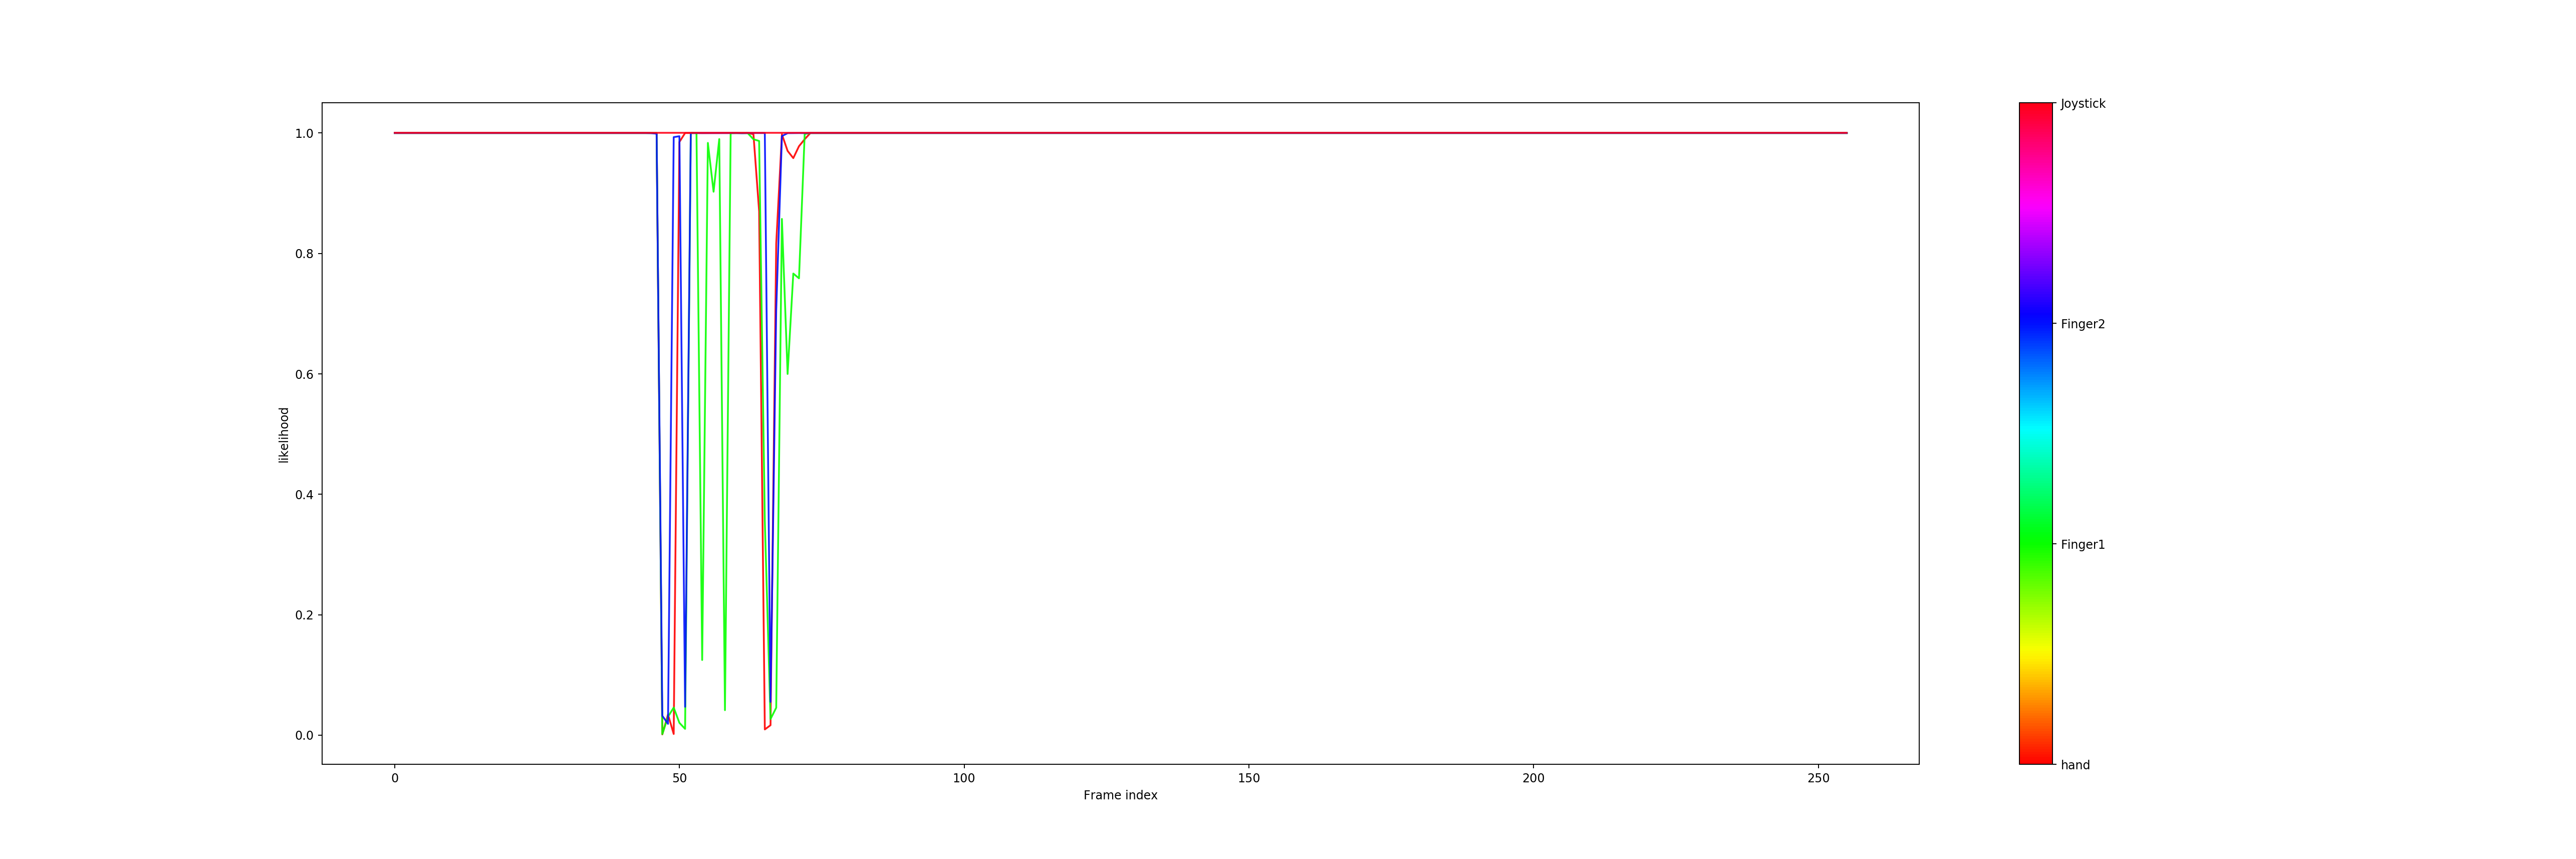

<IPython.core.display.Javascript object>


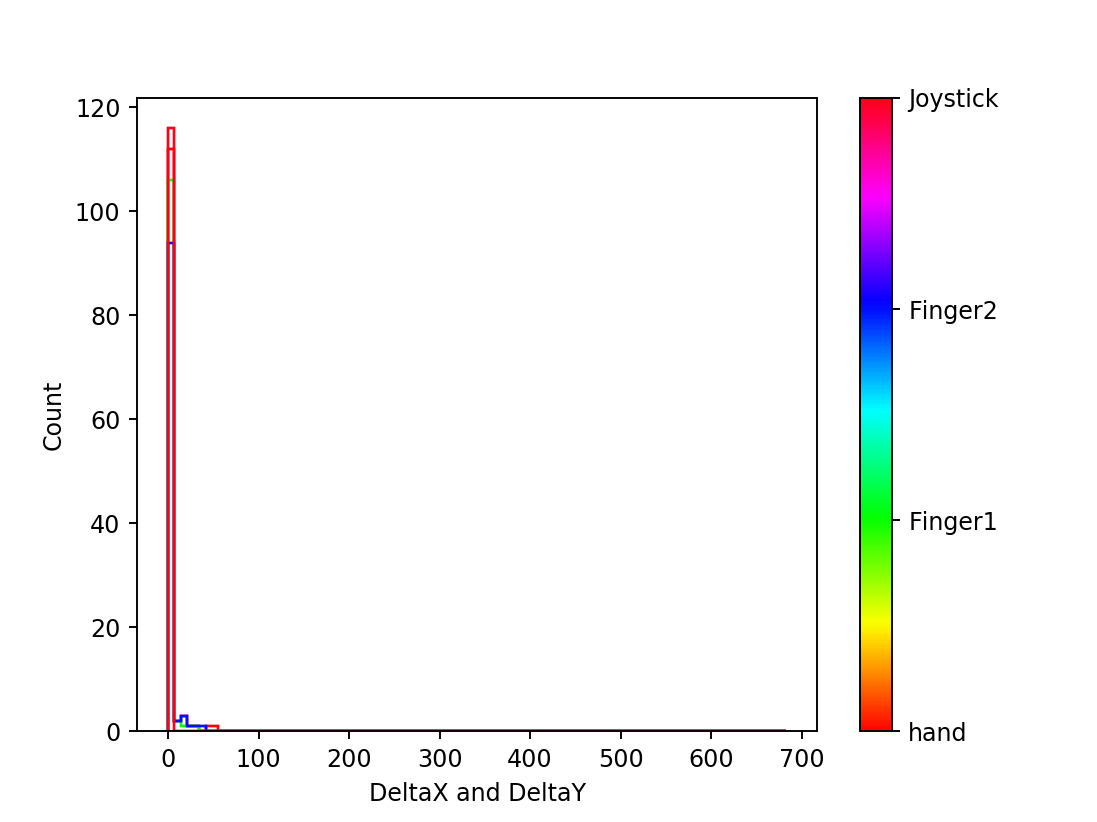

Plots created! Please check the directory "plot-poses" within the video directory


In [15]:
%matplotlib notebook 
#for making interactive plots.
#deeplabcut.plot_trajectories(path_config_file,videofile_path, plotting=True)

deeplabcut.plot_trajectories(path_config_file,videofile_path,showfigures=True)